In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.datasets import load_iris

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

data = load_iris()

In [ ]:
X =  data.data
y =  data.target

X_train,X_test, YTrain,Y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
df = pd.concat([pd.DataFrame(X,columns=data.feature_names),pd.DataFrame(y,columns=['target'])],axis=1)

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
plt.rcParams['figure.figsize'] = (12,6)

<Axes: >

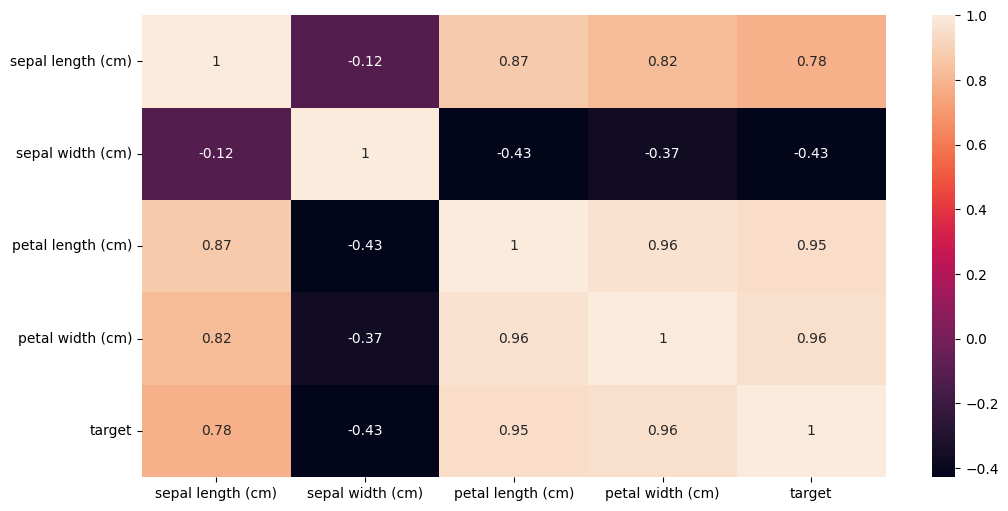

In [ ]:
sns.heatmap(df.corr(),annot=True)

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

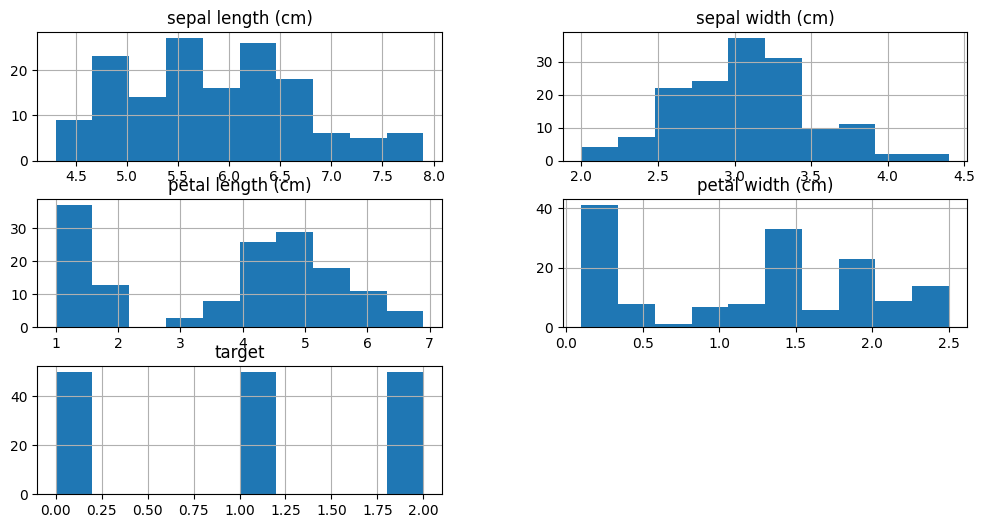

In [ ]:
df.hist()

<Axes: >

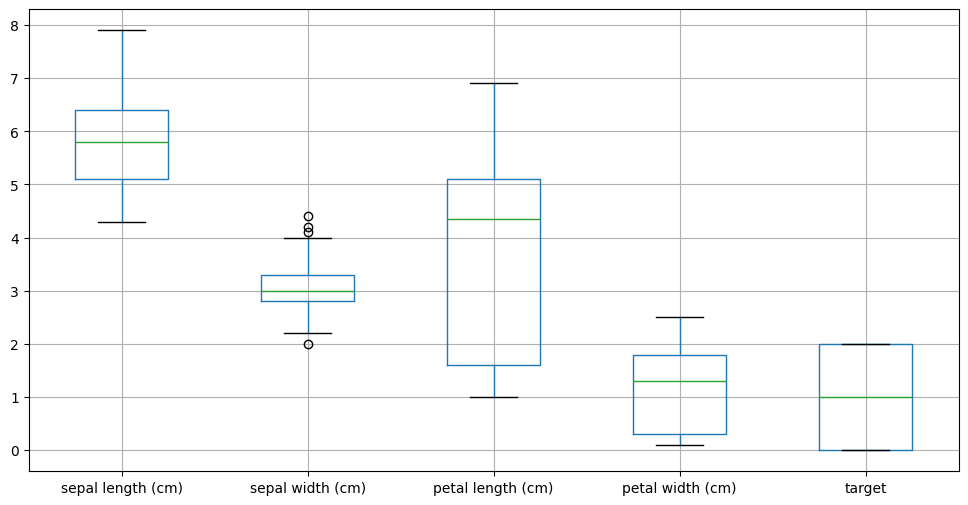

In [ ]:
df.boxplot()

In [ ]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler().fit(X_train)
st.transform(X_test)

array([[ 0.21263431, -0.12083131,  0.59686818,  0.80221502],
       [-1.21152109,  0.78540351, -1.19653855, -1.29622209],
       [ 2.2301878 , -0.12083131,  1.32543966,  1.45797661],
       [ 1.16207125, -0.57394872,  0.59686818,  0.27760574],
       [-0.73680262,  1.01196222, -1.25258251, -1.29622209],
       [-0.49944339,  0.78540351, -1.25258251, -1.03391745],
       [ 0.8060324 , -0.12083131,  1.15730778,  1.32682429],
       [ 1.04339163,  0.1057274 ,  0.54082422,  0.40875806],
       [ 0.21263431, -0.34739001,  0.4287363 ,  0.40875806],
       [ 0.0939547 , -0.12083131,  0.26060441,  0.40875806],
       [-0.85548224,  1.69163833, -1.25258251, -1.16506977],
       [ 0.56867316, -1.70674224,  0.37269234,  0.14645342],
       [-0.14340454, -1.25362483,  0.7089561 ,  1.06451966],
       [-0.14340454, -0.34739001,  0.26060441,  0.14645342],
       [ 0.33131393, -0.57394872,  0.54082422,  0.0153011 ],
       [ 0.33131393, -0.12083131,  0.65291214,  0.80221502],
       [-0.02472492, -0.

In [ ]:
X_std = StandardScaler().fit_transform(X)

In [ ]:
X_train_std,X_test_std, Y_train,Y_test = train_test_split(X_std,y,test_size=0.2)

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_std,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
preds = model.predict(X_test_std)

In [ ]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.90      0.82      0.86        11
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
error_rate = []

for i in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_std,Y_train)
  preds_knn  = knn.predict(X_test_std)
  error_rate.append([1-accuracy_score(Y_test,preds_knn)])


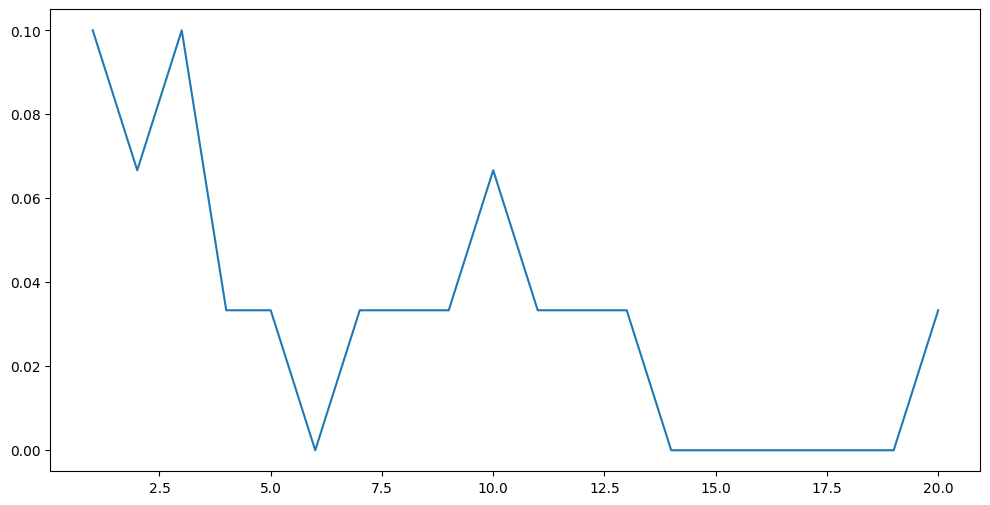

In [ ]:
plt.plot(range(1,21),error_rate)

In [ ]:
optimal_k = error_rate.index(min(error_rate))

In [ ]:
model = KNeighborsClassifier(n_neighbors=optimal_k)
model.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [ ]:
preds_from_k =  model.predict(X_test_std)

In [ ]:
print(classification_report(Y_test,preds_from_k))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.90      0.82      0.86        11
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



Pipeline


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:

model_pipeline =  Pipeline(
    [
        ('scaler',StandardScaler()),
        ('Knn_model',KNeighborsClassifier(n_neighbors=5))
    ]
)

In [ ]:
model_pipeline.fit(X_train,Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Knn_model', KNeighborsClassifier())])

In [ ]:
preds=model_pipeline.predict(X_test)

In [ ]:
X_train.shape

(120, 4)

In [ ]:
input_values_of_new_instance=np.array([[6. , 3. , 4.8, 1.8]])
input_values_of_new_instance.shape


(1, 4)

In [ ]:
model_pipeline.predict(input_values_of_new_instance)[0]

np.int64(1)